# 1. Exploratory Data Analysis ( EDA )

- 학습목표
    - 데이터셋 로드하고, 확인하는 방법
    
- 핵심키워드
    - EDA
    - info()
    - describe()
    - isnull().sum()

# 2. 데이터셋 출처
[Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
- 데이터 구성
    - Pregnancies: 임신횟수
    - Glucose: 2시간동안 경구 포도당 내성 검사에서 혈장 포도당 농도
    - BloodPressure: 이완기 혈압(mm Hg)
    - SkinThickness: 삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값
    - Insulin: 2시간동안 혈청 인슐린
    - BMI: 체질량 지수
    - DiabetesPedigreeFunction: 당뇨병 혈통 기능
    - Age: 나이
    - Outcome: 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0 입니다.

# 3. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 4. 데이터 로드

In [2]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# info()로 데이터타입, 결측치, 메모리 사용량 등의 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 결측치를 봅니다. ( 결측치가 없는 데이터셋 )
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [5]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 수치데이터에 대한 요약을 봅니다.
# 혈압, 피하지방 피부두께, 인슐린, BMI 가 0 이 나올수가 없음

df.describe() # include = 'object'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 가장 마지막에 있는 Outcome은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_columns 라는 변수에 담아줍니다.

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 5. 결측치 시각화
<pre>
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다.
0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다.
따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.
</pre>

In [13]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [19]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [27]:
# 몇퍼센트나 결측치인지 보기위해 True/Flase 는 1, 0
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

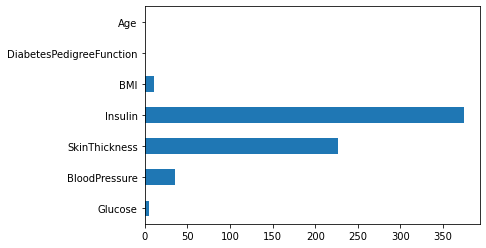

In [25]:
# 결측치의 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

<AxesSubplot:>

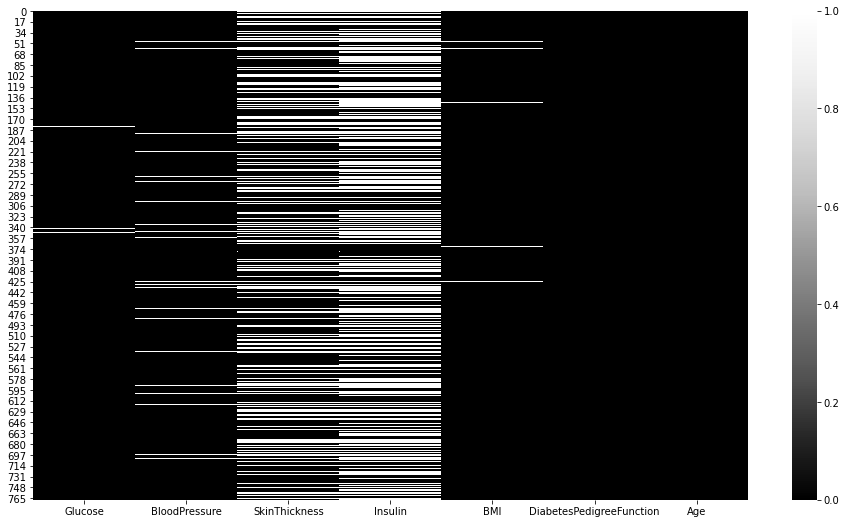

In [32]:
# 결측치를 heatmap 으로 시각화 합니다.
# 인슐린이 결측치가 48% 나 되기때문에 전처리를 해줘야 할것 같다.

plt.figure(figsize = (16, 9))
sns.heatmap(df_null, cmap = 'Greys_r') # 결측치만 따로 시각화

# 6. 정답값
- target, label 이라고 부르기도 합니다.

- 학습 목표
    - 훈련과 예측에 사용하는 정갑값을 시각화할 수 있다.

- 핵심 키워드
    - value_counts()
    - groupby()
    - reset_index()
    - plot().barh()
    - countplot

In [43]:
# 정답값인 Outcome 의 갯수를 봅니다.

df['Outcome'].value_counts() # 당뇨병 걸린사람 268명

0    500
1    268
Name: Outcome, dtype: int64

In [48]:
# 정답값인 Outcome 의 비율을 봅니다.
df['Outcome'].value_counts(normalize = True) # 당뇨병 발병 환자 비율이 34.9%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [59]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
# "Pregnancies"를 groupby 로 그룹화해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index() # groupby(index)['columns']
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

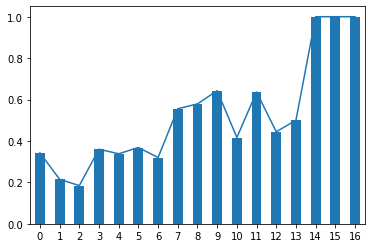

In [65]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot() # 임신횟수 늘어날수록 발병확률 늘어난다.
df_po['mean'].plot.bar(rot = 0)

## 7. Countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

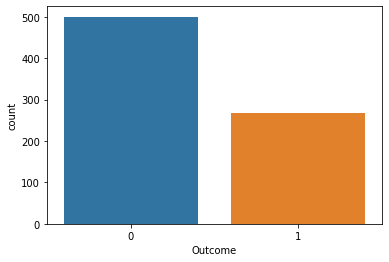

In [67]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교 합니다.
sns.countplot(data = df,
              x = 'Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

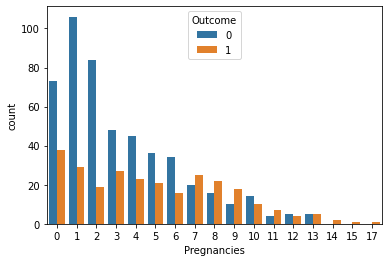

In [69]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.
sns.countplot(data = df,
              x = 'Pregnancies',
              hue = 'Outcome')

In [79]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.

df['Pregnancies_high'] = df['Pregnancies'] > 6 # 파생변수 생성
df[['Pregnancies', 'Pregnancies_high']].head() # 연속된 수치를 범주형 데이터로 만들어주었음.

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

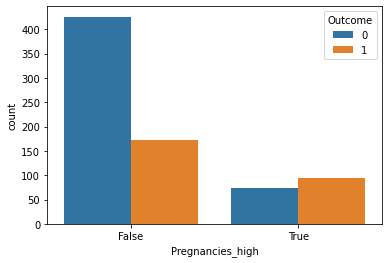

In [81]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고,
# Outcome 값에 따라 다른 색상으로 표현합니다.

sns.countplot(data = df,
              x = 'Pregnancies_high',
              hue = 'Outcome')

## 8. barplot
- 기본 설정으로 시각화하면 y축에는 평균을 추정해서 그리게 됩니다.

- 학습목표
    - 2개의 변수를 시각화할 수 있는 그래프를 이해하고, 사용할 수 있다.


- 핵심 키워드
    - barplot
    - boxplot
    - violinplot
    - swarmplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

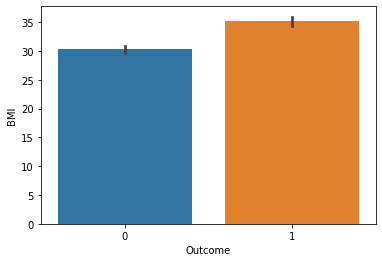

In [88]:
# 당뇨병 발병에 따른 BMI 수치를 비교합니다.

sns.barplot(data = df,
            x = 'Outcome',
            y = 'BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

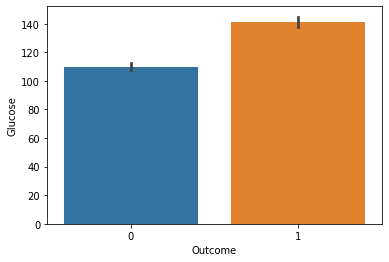

In [89]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치를 비교합니다.
sns.barplot(data = df,
            x = 'Outcome',
            y = 'Glucose')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

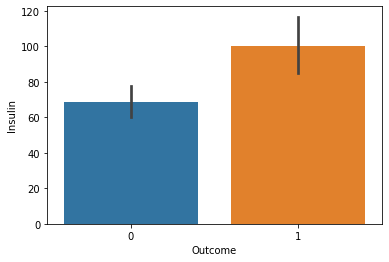

In [91]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교합니다.

sns.barplot(data = df,
            x = 'Outcome',
            y = 'Insulin') # estimator = Mean() 왼쪽 y축의값은 평균값으로 구해지게 된다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

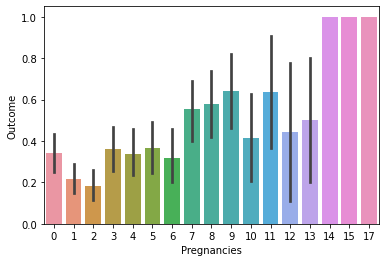

In [93]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교합니다.

sns.barplot(
    data = df,
    x = 'Pregnancies',
    y = 'Outcome' # 발병비율
)

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

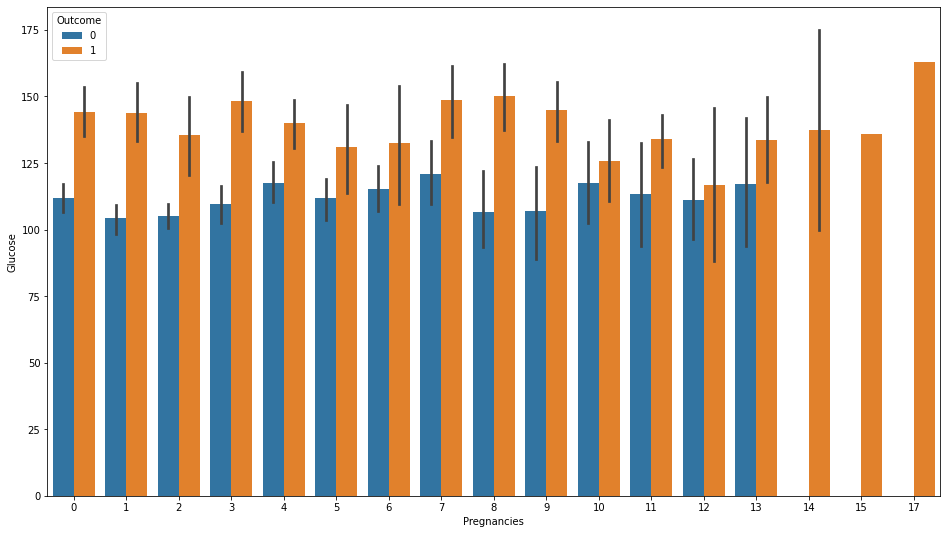

In [96]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose) 수치를 당뇨병 발병여부(Outcome) 에 따라 시각화 합니다.

plt.figure(figsize = (16, 9))
sns.barplot(
    data = df,
    x = 'Pregnancies',
    y = 'Glucose',
    hue = 'Outcome'
)

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

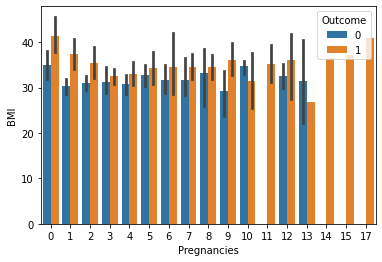

In [107]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI) 수치를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(
    data = df,
    x = 'Pregnancies',
    y = 'BMI',
    hue = 'Outcome'
)

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

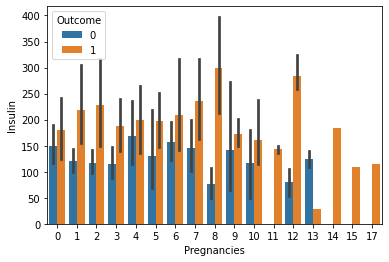

In [108]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.barplot(
    data = df[df['Insulin'] > 0],
    x = 'Pregnancies',
    y = 'Insulin',
    hue = 'Outcome'
)

## 9. boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

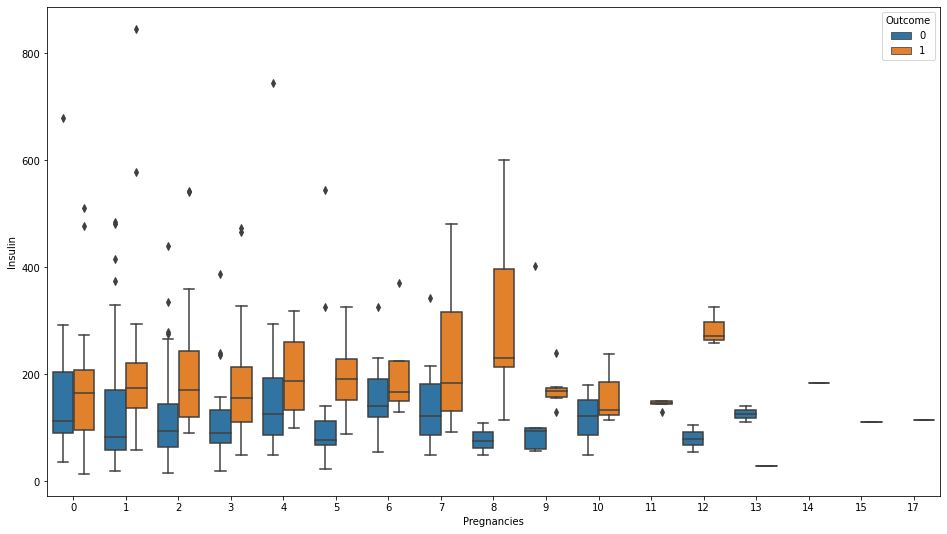

In [106]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.
plt.figure(figsize = (16, 9))
sns.boxplot(data = df[df['Insulin'] > 0],
            x = 'Pregnancies',
            y = 'Insulin',
            hue = 'Outcome')

## 10. violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

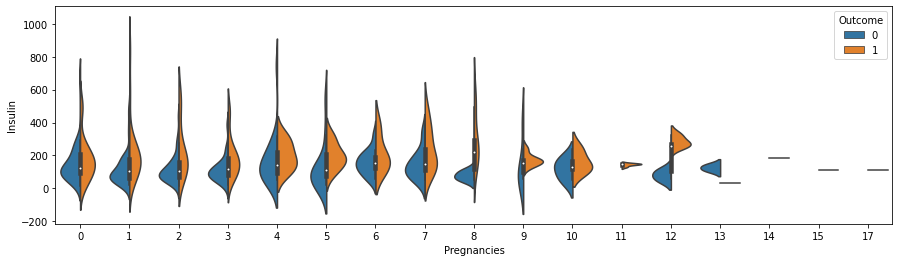

In [112]:
# 위의 그래프를 violinplot 으로 시각화 합니다.

plt.figure(figsize = (15, 4))
sns.violinplot(
    data = df[df['Insulin'] > 0],
    x = 'Pregnancies',
    y = 'Insulin',
    hue = 'Outcome',
    split = True,
)

## 11. swarmplot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

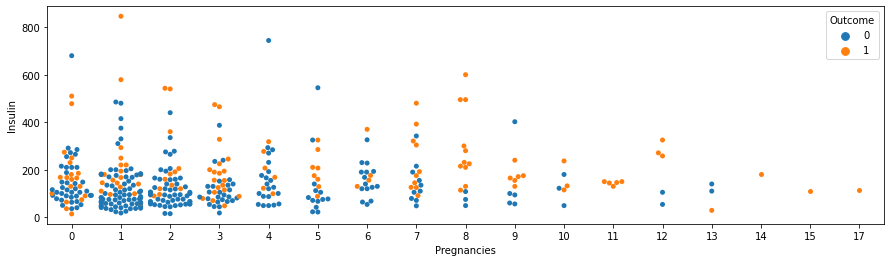

In [116]:
# 위의 그래프를 swarmplot 으로 시각화 하기

plt.figure(figsize = (15, 4))
sns.swarmplot(
    data = df[df['Insulin'] > 0],
    x = 'Pregnancies',
    y = 'Insulin',
    hue = 'Outcome'
)

## 12. distplot
- 학습목표
    - 수치형 변수의 분포를 시각화할 수 있는 displot을 이해하고, 활용할 수 있다.
- 핵심키워드
    - distplot

In [133]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]

df_0.shape, df_1.shape

((500, 10), (268, 10))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

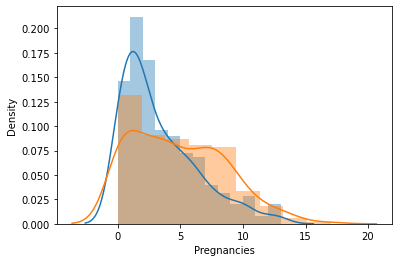

In [135]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

# rug: 데이터빈도 표시할건지

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level funct

<AxesSubplot:xlabel='Age', ylabel='Density'>

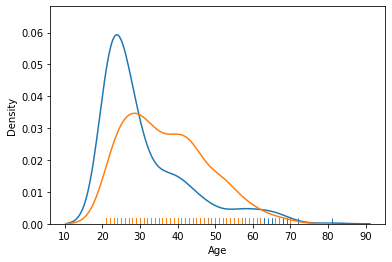

In [147]:
# 나이에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

## 13. Subplots

### 13-1. Pandas 를 통한 histplot 그리기
- pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.

### 13-2. 반복문을 통한 서브플롯 그리기

#### 13.2.1 distplot

In [148]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.



In [149]:
# distplot 으로 서브플롯을 그립니다.



In [151]:
# 모든 변수에 대한 distplot을 그려 봅니다.



#### 13.2.2 violinplot